In [5]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.drop('Serial No.',inplace=True,axis=1)

In [10]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [40]:
model=Sequential()

In [41]:
model.add(Dense(7,activation="relu",input_dim=7))

In [42]:
model.add(Dense(7,activation='relu'))

In [43]:
model.add(Dense(1,activation="linear"))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(loss="mean_squared_error",optimizer="Adam")

In [46]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 38ms/step - loss: 0.1658 - val_loss: 0.1327
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0996 - val_loss: 0.0720
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0504 - val_loss: 0.0322
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0213 - val_loss: 0.0149
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0112 - val_loss: 0.0127
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0104 - val_loss: 0.0132
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0101 - val_loss: 0.0124
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0095 - val_loss: 0.0116
Epoch 9/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0090 - val_loss: 0.0113
Epoch 10/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0088 - val_loss: 0.0111
Epoch 1

10/10 [==============================] - 0s 9ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 83/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 84/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0047
Epoch 85/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 86/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 87/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 88/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 89/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0047
Epoch 90/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 91/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 92/100


In [47]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 7ms/step


In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y_test,y_pred)

0.8124910603824188

In [50]:
import matplotlib.pyplot as plt

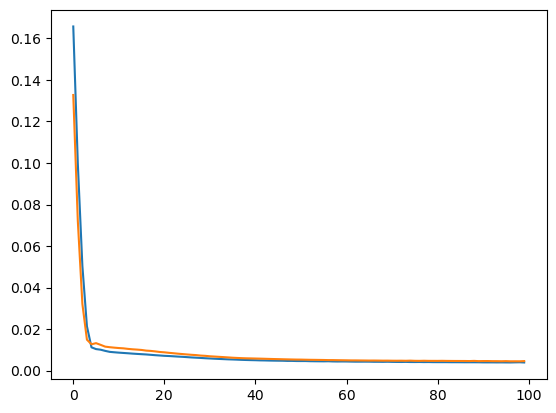

In [51]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])